# Bayesian Statistics

**Importing Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Looking at probabilites in the Titanic dataset

In [3]:
data = "data/titanic/train.csv"

df = pd.read_csv(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
pd.crosstab(df['Survived'], df['Sex'], margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [6]:
pd.crosstab(df['Survived'], df['Sex'], normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


### Bayesian Statistics Understanding

Using the probabilities of two events E1 and E2, Bayes' Theorem can be stated as:

P(E1 | E2) = P(E2 | E1) * P(E1) / P(E2)

where:

P(E1): Prior probability
P(E2): Evidence
P(E2 | E1): Likelihood
P(E1 | E2): Posterior probability
Prior probability
The prior probability of an event is its probability obtained from some information know beforehand. But what does “before” or prior mean? We can think of this value as the probability of the event, given the information that’s already known. Let’s use an example where we would like to determine the probability of the weather being sunny. The prior probability would be the knowledge of how many times it has been sunny on this particular calendar date.

Evidence
We can use current evidence to update our prediction. For example, the evidence for our sunny weather example could be the probability of the atmospheric pressure being high - P(High Pressure). This equation is the probability of having high pressure, whether it’s cloudy or sunny.

Likelihood
The likelihood represents a conditional probability, where the occurrence of one event depends on the other event having also occurred. In the weather example, this is the probability of having high pressure with it also being sunny.

Posterior probability
The term on the left is the posterior probability (or “after” probability) or also just the “posterior.” It represents the updated prior probability after taking into account some new piece of information.

Putting all these terms together looks like this:

P(Sunny | High Pressure) = P(High Pressure | Sunny) * P(Sunny) / P(High Pressure)

 

Calculate the probability
We can assign probabilities to each of the above quantities and then calculate the posterior probability. For example, let’s assume the probability of sunny weather is P(Sunny) = 0.5; the P(High Pressure) = 0.7; and the probability of high pressure if it’s sunny is P(High Pressure | Sunny) = 0.9.

P(Sunny | High Pressure) = (0.9 * 0.5) / 0.7 = 0.64 which is a 64% percent probability that it will be sunny if there is also high pressure.

### Bayesian Statistics and a bias coin flip

Text(0, 0.5, 'P(Heads Bias)')

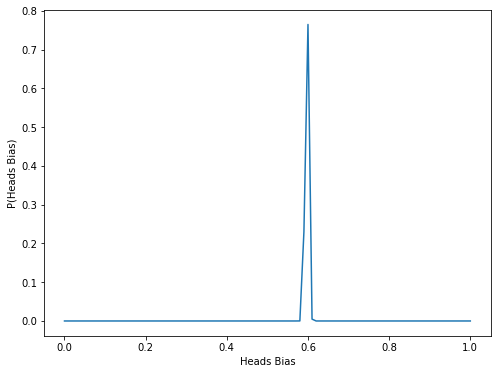

In [7]:
# Set the number of flips
N = 15000

# Set the bias of the coin
BIAS_HEADS = 0.6

# The range of biases the coin could have 
# (0, 0.01, 0.02, ... 0.98, 0.99, 1)
bias_range = np.linspace(0, 1, 101)

# Uniform prior distribution
# (start with coins that have the same bias)
prior_bias_heads = np.ones(len(bias_range)) / len(bias_range)

# Create a random series of 0's and 1's (coin flips) with the bias
flip_series = (np.random.rand(N) <= BIAS_HEADS).astype(int)

# For each flip, calculate the probabilities and update
for flip in flip_series:
    likelihood = bias_range**flip * (1-bias_range)**(1-flip)
    evidence = np.sum(likelihood * prior_bias_heads)
    prior_bias_heads = likelihood * prior_bias_heads / evidence

# Create the plot
plt.figure(figsize=(8,6))
plt.plot(bias_range, prior_bias_heads)
plt.xlabel('Heads Bias')
plt.ylabel('P(Heads Bias)')